In [7]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd

df = pd.read_csv("../data/spot_data.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

close_prices = df["Close"]


In [8]:
from utils.hv_calculator import calculate_historical_volatility

hv_20 = calculate_historical_volatility(close_prices, window=20)


In [9]:
from utils.iv_simulator import simulate_implied_volatility

iv_sim = simulate_implied_volatility(hv_20, mode="random")


In [10]:
from utils.strategy_rules import generate_volatility_signals

signals = generate_volatility_signals(iv_sim, hv_20)

# Optional: Check counts
print(signals.value_counts())


Hold    253
Sell    137
Name: count, dtype: int64


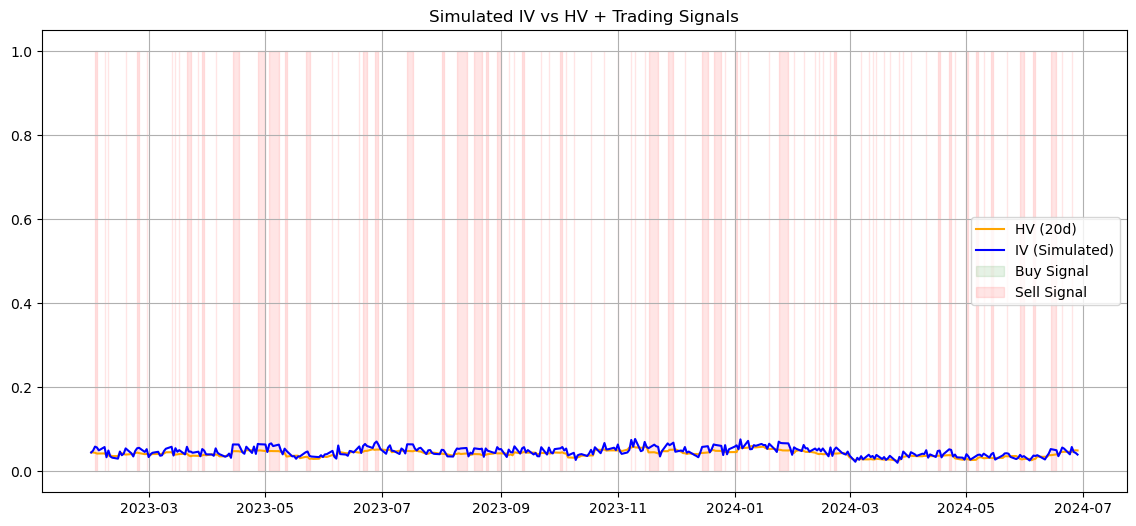

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(hv_20.index, hv_20, label="HV (20d)", color="orange")
plt.plot(iv_sim.index, iv_sim, label="IV (Simulated)", color="blue")
plt.fill_between(iv_sim.index, 0, 1, where=signals=="Buy", color="green", alpha=0.1, label="Buy Signal")
plt.fill_between(iv_sim.index, 0, 1, where=signals=="Sell", color="red", alpha=0.1, label="Sell Signal")
plt.legend()
plt.title("Simulated IV vs HV + Trading Signals")
plt.grid()
plt.show()


In [12]:
from utils.payoff_calculator import simulate_straddle_payoff

results = simulate_straddle_payoff(close_prices, signals, hold_period=5, premium_pct=0.03)
results.head()


,date,signal,entry_price,exit_price,pnl
0,2023-02-01,Sell,17894.071472,17762.396278,405.146950
1,2023-02-02,Sell,17822.834063,17732.364344,444.215303
2,2023-02-06,Sell,17801.161056,17687.694326,420.568101
3,2023-02-08,Sell,17762.396278,17779.633374,515.634793
4,2023-02-17,Sell,17767.875073,17562.726323,327.887503


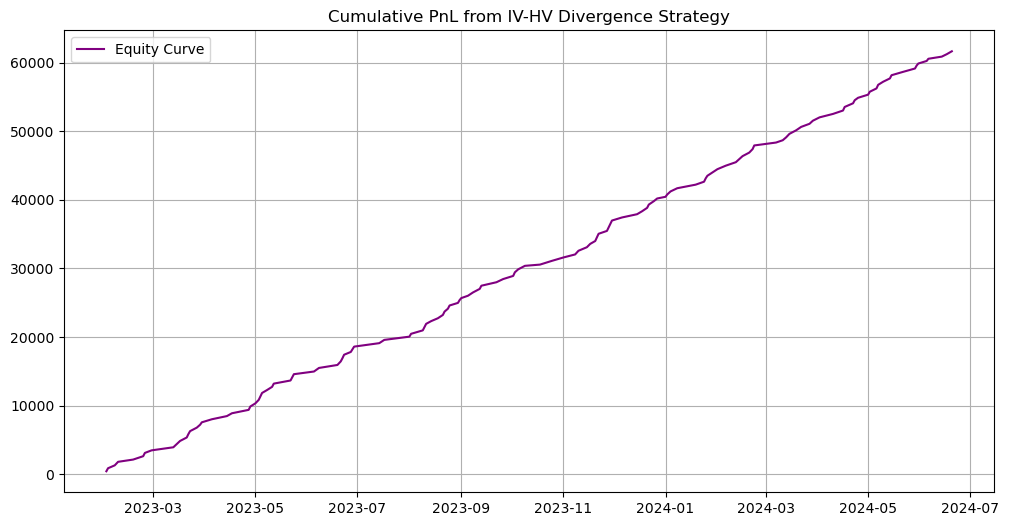

In [13]:
results["cum_pnl"] = results["pnl"].cumsum()

plt.figure(figsize=(12,6))
plt.plot(results["date"], results["cum_pnl"], label="Equity Curve", color="purple")
plt.title("Cumulative PnL from IV-HV Divergence Strategy")
plt.grid()
plt.legend()
plt.show()


In [ ]:
›